In [1]:
import numpy as np
import rasterio as rs
import matplotlib.pyplot as plt
from numpy import loadtxt
from osgeo import gdal, gdalconst
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
from sklearn.ensemble import IsolationForest
from sklearn import svm
#import earthpy.spatial as es
#import earthpy.plot as ep
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from numpy import *

In [2]:
#Import Imagery
asi = 'Input/Imagery/Subset_SingleDateImage_Amsterdam.tif'
ami = 'Input/Imagery/Subset_MedianImage_Amsterdam.tif'
msi = 'Input/Imagery/Subset_SingleDateImage_Milano.tif'
mmi = 'Input/Imagery/Subset_MedianImage_Milano.tif'
bsi = 'Input/Imagery/Subset_SingleDateImage_Budapest.tif'
bmi = 'Input/Imagery/Subset_MedianImage_Budapest.tif'
#Import Feature extraction
EMPas = np.load('D:/Thesis/Notebooks/Output/Sub/EMP/empasi.npy')
NDWIas = loadtxt('D:/Thesis/Notebooks/Output/Sub/NDWI/ndwiasi.csv', delimiter=',')
NDVIas = loadtxt('D:/Thesis/Notebooks/Output/Sub/NDVI/ndviasi.csv', delimiter=',')
EMPam = np.load('D:/Thesis/Notebooks/Output/Sub/EMP/empami.npy')
NDWIam = loadtxt('D:/Thesis/Notebooks/Output/Sub/NDWI/ndwiami.csv', delimiter=',')
NDVIam = loadtxt('D:/Thesis/Notebooks/Output/Sub/NDVI/ndviami.csv', delimiter=',')
EMPms = np.load('D:/Thesis/Notebooks/Output/Sub/EMP/empmsi.npy')
NDWIms = loadtxt('D:/Thesis/Notebooks/Output/Sub/NDWI/ndwimsi.csv', delimiter=',')
NDVIms = loadtxt('D:/Thesis/Notebooks/Output/Sub/NDVI/ndvimsi.csv', delimiter=',')
EMPmm = np.load('D:/Thesis/Notebooks/Output/Sub/EMP/empmmi.npy')
NDWImm = loadtxt('D:/Thesis/Notebooks/Output/Sub/NDWI/ndwimmi.csv', delimiter=',')
NDVImm = loadtxt('D:/Thesis/Notebooks/Output/Sub/NDVI/ndvimmi.csv', delimiter=',')
EMPbs = np.load('D:/Thesis/Notebooks/Output/Sub/EMP/empbsi.npy')
NDWIbs = loadtxt('D:/Thesis/Notebooks/Output/Sub/NDWI/ndwibsi.csv', delimiter=',')
NDVIbs = loadtxt('D:/Thesis/Notebooks/Output/Sub/NDVI/ndvibsi.csv', delimiter=',')
EMPbm = np.load('D:/Thesis/Notebooks/Output/Sub/EMP/empbmi.npy')
NDWIbm = loadtxt('D:/Thesis/Notebooks/Output/Sub/NDWI/ndwibmi.csv', delimiter=',')
NDVIbm = loadtxt('D:/Thesis/Notebooks/Output/Sub/NDVI/ndvibmi.csv', delimiter=',')
#Import Twitter
Twita = rs.open('Input/Twitter/Subset_TwitterRaster_Amsterdam.tif','r').read()
Twita = np.transpose(Twita, [1, 2, 0])
Twita = Twita[:,:,0]
Twitm = rs.open('Input/Twitter/Subset_TwitterRaster_Milano.tif','r').read()
Twitm = np.transpose(Twitm, [1, 2, 0])
Twitm = Twitm[:,:,0]
Twitb = rs.open('Input/Twitter/Subset_TwitterRaster_Budapest.tif','r').read()
Twitb = np.transpose(Twitb, [1, 2, 0])
Twitb = Twitb[:,:,0]
#Import Validation datasets
Vala = rs.open('Input/Validation/Validation_30m_Amsterdam_sub.tif','r').read()
Vala = np.transpose(Vala, [1, 2, 0])
Val30ma = Vala[:,:,0]
Val30ma = np.where(Val30ma==2, 1, 0)
Val30ma = Val30ma.flatten()
Val2a = rs.open('Input/Validation/Validation_GAIA_Amsterdam_sub.tif','r').read()
Val2a = np.transpose(Val2a, [1, 2, 0])
Val2GAIAa = Val2a[:,:,0]
Val2GAIAa = np.where(Val2GAIAa>0, 1, 0)
Val2GAIAa = Val2GAIAa.flatten()
Val3a = rs.open('Input/Validation/Validation_GHS_Amsterdam_sub.tif', 'r').read()
Val3a = np.transpose(Val3a, [1, 2, 0])
Val3GHSa = Val3a[:,:,0]
Val3GHS50a = np.where(Val3GHSa>50, 1, 0)
Val3GHS50a = Val3GHS50a.flatten()
Valm = rs.open('Input/Validation/Validation_30m_Milano_sub.tif','r').read()
Valm = np.transpose(Valm, [1, 2, 0])
Val30mm = Valm[:,:,0]
Val30mm = np.where(Val30mm==2, 1, 0)
Val30mm = Val30mm.flatten()
Val2m = rs.open('Input/Validation/Validation_GAIA_Milano_sub.tif','r').read()
Val2m = np.transpose(Val2m, [1, 2, 0])
Val2GAIAm = Val2m[:,:,0]
Val2GAIAm = np.where(Val2GAIAm>0, 1, 0)
Val2GAIAm = Val2GAIAm.flatten()
Val3m = rs.open('Input/Validation/Validation_GHS_Milano_sub.tif', 'r').read()
Val3m = np.transpose(Val3m, [1, 2, 0])
Val3GHSm = Val3m[:,:,0]
Val3GHS50m = np.where(Val3GHSm>50, 1, 0)
Val3GHS50m = Val3GHS50m.flatten()
Valb = rs.open('Input/Validation/Validation_30m_Budapest_sub.tif','r').read()
Valb = np.transpose(Valb, [1, 2, 0])
Val30mb = Valb[:,:,0]
Val30mb = np.where(Val30mb==2, 1, 0)
Val30mb = Val30mb.flatten()
Val2b = rs.open('Input/Validation/Validation_GAIA_Budapest_sub.tif','r').read()
Val2b = np.transpose(Val2b, [1, 2, 0])
Val2GAIAb = Val2b[:,:,0]
Val2GAIAb = np.where(Val2GAIAb>0, 1, 0)
Val2GAIAb = Val2GAIAb.flatten()
Val3b = rs.open('Input/Validation/Validation_GHS_Budapest_sub.tif', 'r').read()
Val3b = np.transpose(Val3b, [1, 2, 0])
Val3GHSb = Val3b[:,:,0]
Val3GHS50b = np.where(Val3GHSb>50, 1, 0)
Val3GHS50b = Val3GHS50b.flatten()

In [3]:
#Plot Image
def read_data_EMP(inras):
    # Read data
    img = gdal.Open(inras, gdal.GA_ReadOnly) 
    bands = [img.GetRasterBand(i).ReadAsArray() for i in range(1, img.RasterCount + 1)]
    img = np.array(bands)
    img = img[0:12,:,:]
    img = np.transpose(img, [1, 2, 0])
    img_rgbnir = img[:,:,[3,2,1,7]]
    return img_rgbnir
def MyNormalize(img_i,sigma):
        nr,nc,nb = img_i.shape
        img_n = np.zeros(shape=(nr,nc,nb))
        for i in range(0,nb):
            one_band = img_i[:,:,i]
            mi = np.min(one_band)
            ma = np.max(one_band)
            one_band = (one_band-mi)/(ma-mi+np.finfo(float).eps)
            img_n[:,:,i] = sigma*one_band
        return img_n 

In [4]:
GLCM_ASI_load = loadtxt('D:/Thesis/Notebooks/Output/Sub/GLCM/ASI/GLCM_ASI_sub.csv', delimiter=',')
img = read_data_EMP(asi)
nr, nc, nb = img.shape
nf = 16
GLCMas = GLCM_ASI_load.reshape(nr,nc,nf)
where_are_NaNs = isnan(GLCMas)
GLCMas[where_are_NaNs] = 0

GLCM_AMI_load = loadtxt('D:/Thesis/Notebooks/Output/Sub/GLCM/AMI/GLCM_AMI_sub.csv', delimiter=',')
img = read_data_EMP(ami)
nr, nc, nb = img.shape
nf = 16
GLCMam = GLCM_AMI_load.reshape(nr,nc,nf)
where_are_NaNs = isnan(GLCMam)
GLCMam[where_are_NaNs] = 0

GLCM_MSI_load = loadtxt('D:/Thesis/Notebooks/Output/Sub/GLCM/MSI/GLCM_MSI_sub.csv', delimiter=',')
img = read_data_EMP(msi)
nr, nc, nb = img.shape
nf = 16
GLCMms = GLCM_MSI_load.reshape(nr,nc,nf)
where_are_NaNs = isnan(GLCMms)
GLCMms[where_are_NaNs] = 0

GLCM_MMI_load = loadtxt('D:/Thesis/Notebooks/Output/Sub/GLCM/MMI/GLCM_MMI_sub.csv', delimiter=',')
img = read_data_EMP(mmi)
nr, nc, nb = img.shape
nf = 16
GLCMmm = GLCM_MMI_load.reshape(nr,nc,nf)
where_are_NaNs = isnan(GLCMmm)
GLCMmm[where_are_NaNs] = 0

GLCM_BSI_load = loadtxt('D:/Thesis/Notebooks/Output/Sub/GLCM/BSI/GLCM_BSI_sub.csv', delimiter=',')
img = read_data_EMP(bsi)
nr, nc, nb = img.shape
nf = 16
GLCMbs = GLCM_BSI_load.reshape(nr,nc,nf)
where_are_NaNs = isnan(GLCMbs)
GLCMbs[where_are_NaNs] = 0

GLCM_BMI_load = loadtxt('D:/Thesis/Notebooks/Output/Sub/GLCM//BMI/GLCM_BMI_sub.csv', delimiter=',')
img = read_data_EMP(bmi)
nr, nc, nb = img.shape
nf = 16
GLCMbm = GLCM_BMI_load.reshape(nr,nc,nf)
where_are_NaNs = isnan(GLCMbm)
GLCMbm[where_are_NaNs] = 0

In [5]:
img = read_data_EMP(asi)
stack = np.concatenate((img, EMPas, GLCMas), axis=2)
stacked = np.dstack((stack, NDVIas, NDWIas))
#Setup for IF and OCSVM
X = stacked
Ytr1 = Twita
nr,nc,nb = X.shape
ns = nr*nc
X = X.reshape((ns,nb))
Ytr = Ytr1.reshape((ns,))
ind = np.where(Ytr > 0)
Xtr = X[ind[0],:]
Ytr = Ytr[ind[0]]
standard_scaler = StandardScaler()
Xtr = standard_scaler.fit_transform(Xtr) 
X = standard_scaler.transform(X)

model = IsolationForest(n_estimators = 50)
model.fit(Xtr)
yhat = model.predict(X)
params = model.get_params(deep=True)
yhat1 = (yhat-min(yhat))/(max(yhat)-min(yhat))
class_map1 = np.reshape(yhat1,(nr,nc))

if_opt_predict = np.savetxt('D:/Thesis/Notebooks/Output/Sub/_IF/if_opt_predict.csv', class_map1, delimiter=',')

In [15]:
img = read_data_EMP(msi)
stack = np.concatenate((img, EMPms, GLCMms), axis=2)
stacked = np.dstack((stack, NDVIms, NDWIms))
#Setup for IF and OCSVM
X = stacked
Ytr1 = Twitm
nr,nc,nb = X.shape
ns = nr*nc
X = X.reshape((ns,nb))
Ytr = Ytr1.reshape((ns,))
ind = np.where(Ytr > 0)
Xtr = X[ind[0],:]
Ytr = Ytr[ind[0]]
standard_scaler = StandardScaler()
Xtr = standard_scaler.fit_transform(Xtr) 
X = standard_scaler.transform(X)

model = IsolationForest(n_estimators = 130)
model.fit(Xtr)
yhat = model.score_samples(X)
params = model.get_params(deep=True)
yhat1 = (yhat-min(yhat))/(max(yhat)-min(yhat))
class_map1 = np.reshape(yhat1,(nr,nc))

if_opt_msisub = np.savetxt('D:/Thesis/Notebooks/Output/Sub/_IF/if_opt_msisub.csv', class_map1, delimiter=',')

In [16]:
img = read_data_EMP(bsi)
stack = np.concatenate((img, EMPbs, GLCMbs), axis=2)
stacked = np.dstack((stack, NDVIbs, NDWIbs))
#Setup for IF and OCSVM
X = stacked
Ytr1 = Twitb
nr,nc,nb = X.shape
ns = nr*nc
X = X.reshape((ns,nb))
Ytr = Ytr1.reshape((ns,))
ind = np.where(Ytr > 0)
Xtr = X[ind[0],:]
Ytr = Ytr[ind[0]]
standard_scaler = StandardScaler()
Xtr = standard_scaler.fit_transform(Xtr) 
X = standard_scaler.transform(X)

model = IsolationForest(n_estimators = 70)
model.fit(Xtr)
yhat = model.score_samples(X)
params = model.get_params(deep=True)
yhat1 = (yhat-min(yhat))/(max(yhat)-min(yhat))
class_map1 = np.reshape(yhat1,(nr,nc))

if_opt_bsisub = np.savetxt('D:/Thesis/Notebooks/Output/Sub/_IF/if_opt_bsisub.csv', class_map1, delimiter=',')

In [6]:
if_opt_asisub = np.loadtxt('D:/Thesis/Notebooks/Output/Sub/_IF/if_opt_asisub.csv', delimiter=',')
if_opt_msisub = np.loadtxt('D:/Thesis/Notebooks/Output/Sub/_IF/if_opt_msisub.csv', delimiter=',')
if_opt_bsisub = np.loadtxt('D:/Thesis/Notebooks/Output/Sub/_IF/if_opt_bsisub.csv', delimiter=',')

if_opt_predict = np.loadtxt('D:/Thesis/Notebooks/Output/Sub/_IF/if_opt_predict.csv', delimiter=',')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


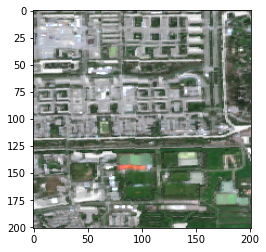

In [37]:
img = read_data_EMP(asi)
plt.imshow(MyNormalize(img,3))

In [38]:
Valb = rs.open('Input/Validation/Validation_30m_Amsterdam_sub.tif','r').read()
Valb = np.transpose(Valb, [1, 2, 0])
Val30mb = Valb[:,:,0]
Val30mb = np.where(Val30mb==2, 1, 0)



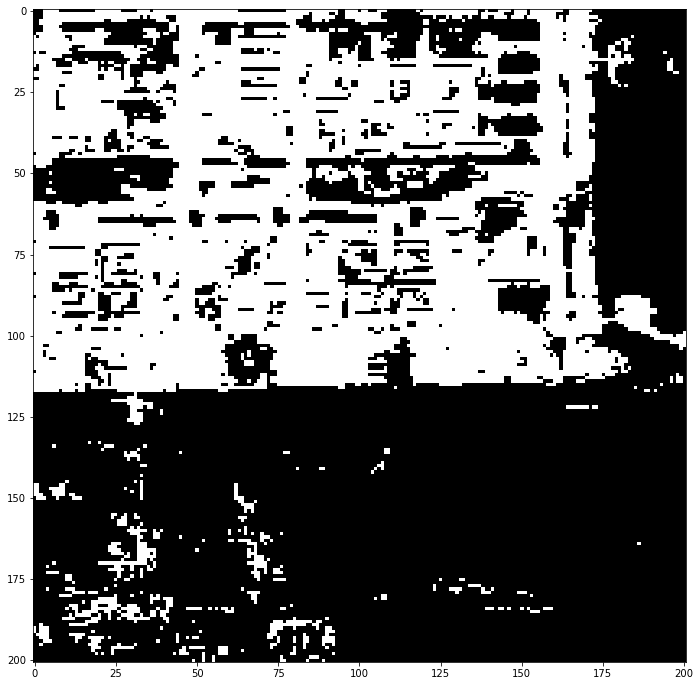

In [7]:
fig, ax = plt.subplots(figsize=(12, 12))
im = ax.imshow(if_opt_predict, cmap="gray")


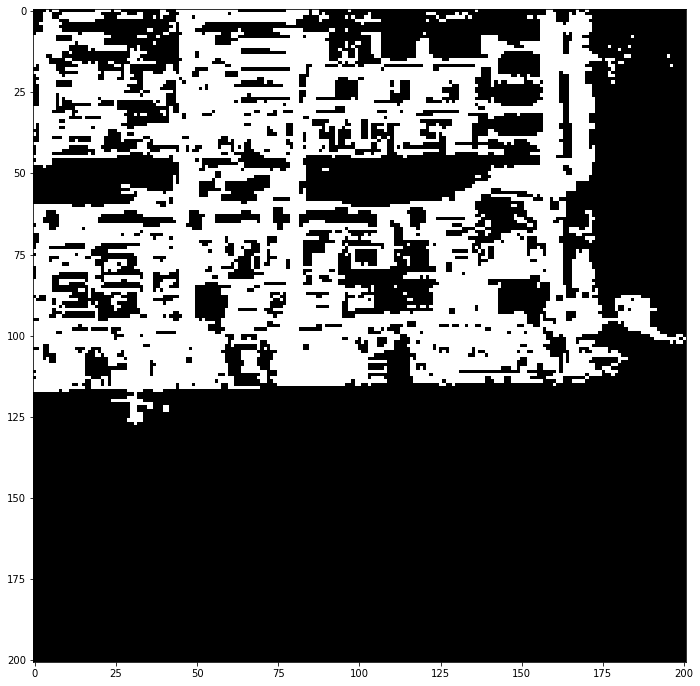

In [21]:
class_map = if_opt_asisub 
class_map = np.where(class_map>0.7, 1, 0)
fig, ax = plt.subplots(figsize=(12, 12))
im = ax.imshow(, cmap="gray")

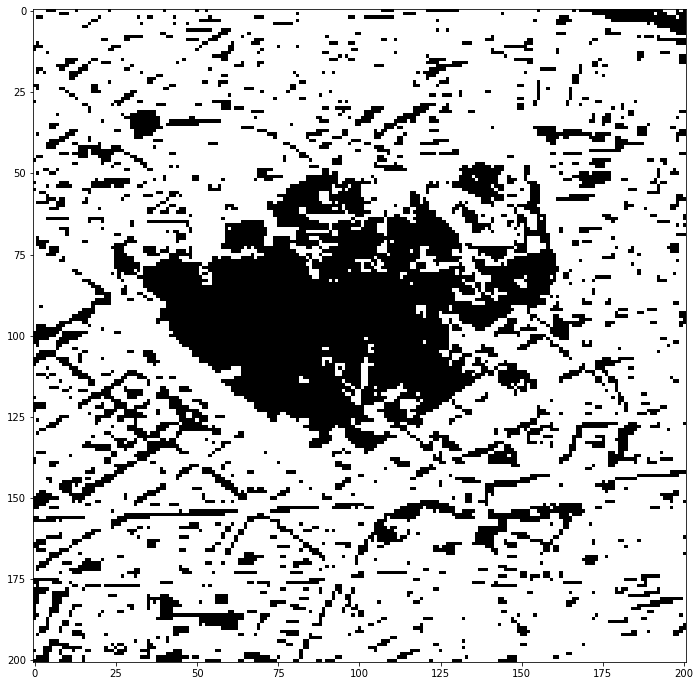

In [22]:
class_map = if_opt_msisub 
class_map = np.where(class_map>0.6, 1, 0)
fig, ax = plt.subplots(figsize=(12, 12))
im = ax.imshow(class_map, cmap="gray")

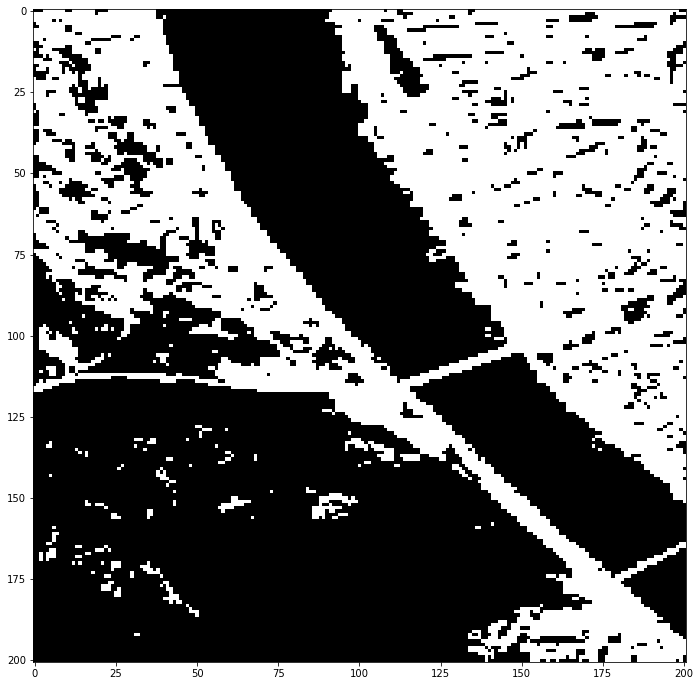

In [23]:
class_map = if_opt_bsisub
class_map = np.where(class_map>0.7, 1, 0)
fig, ax = plt.subplots(figsize=(12, 12))
im = ax.imshow(class_map, cmap="gray")